# **Music Genre Classification**

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import librosa, IPython
import librosa.display as lplt
from scipy import optimize
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##**Loading Dataset**

In [3]:
music_data_url = "https://raw.githubusercontent.com/rohanmaladkar/Mucsic-gener-classification/main/Music%20Genre%20dataset%20(1).csv"
music_features_url = "https://raw.githubusercontent.com/rohanmaladkar/Mucsic-gener-classification/main/features_3_sec.csv"
music_data = pd.read_csv(music_data_url)
music_features = pd.read_csv(music_features_url)
music_data

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,0.351991,0.079469,2008.581132,2106.617024,4254.215942,0.089267,-153.632309,109.857262,-23.085709,...,12.350816,-12.306271,5.780973,-10.279924,1.791489,-13.304210,2.473193,-6.717574,-1.189238,rock
996,rock.00096.wav,0.398653,0.076452,2006.051164,2068.327905,4147.374921,0.097659,-142.424210,116.219780,-32.177074,...,14.065345,-16.394691,4.152589,-4.350760,3.736455,-10.845638,1.875218,-7.459579,-2.802677,rock
997,rock.00097.wav,0.432103,0.081617,2077.190361,1926.989678,4030.767293,0.121824,-125.031311,115.194977,-47.993507,...,10.481961,-17.951916,1.211113,-11.534864,1.844774,-12.847901,3.447425,-12.594178,-2.107002,rock
998,rock.00098.wav,0.362349,0.083888,1398.672358,1818.148469,3014.740104,0.048731,-224.972305,123.656891,-9.754534,...,7.683081,-10.071786,-0.255098,-5.276486,-2.816289,-4.416438,1.558265,-5.043121,-3.585596,rock


In [4]:
music_features

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [5]:
music_data.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.378669,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479170,99.552199,-8.921949,36.293061,...,-6.021121,4.471604,-4.797232,1.781547,-3.870276,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,0.081706,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235659,31.331904,21.695015,16.666986,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064026,-1.527147,-89.901138,-18.768461,...,-28.052265,-15.805225,-27.542309,-12.598773,-17.545473,-15.693589,-17.227766,-11.975698,-18.504187,-19.935202
25%,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695129,76.811485,-24.223789,24.107393,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194296,-2.003978,-4.670281,-3.367999
50%,0.383075,0.122448,2209.468780,2221.408983,4658.671829,0.099539,-120.206070,98.452553,-10.716073,36.957073,...,-5.920161,3.891842,-4.199810,1.879423,-3.614473,1.211945,-4.059109,0.669789,-2.391261,-1.155198
75%,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895018,119.893629,5.505793,48.212825,...,-1.004241,9.706133,-0.161017,5.155263,-0.323536,4.350694,-0.842968,3.112519,0.149070,1.303739
max,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034588,193.096512,56.666088,80.691277,...,17.421038,23.037573,13.054334,18.161661,12.357588,13.468802,11.489994,15.379257,14.686911,15.368967


## **Data Preprocessing**

In [7]:
music_data.isnull().sum()

filename              0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [9]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   chroma_stft         1000 non-null   float64
 2   rmse                1000 non-null   float64
 3   spectral_centroid   1000 non-null   float64
 4   spectral_bandwidth  1000 non-null   float64
 5   rolloff             1000 non-null   float64
 6   zero_crossing_rate  1000 non-null   float64
 7   mfcc1               1000 non-null   float64
 8   mfcc2               1000 non-null   float64
 9   mfcc3               1000 non-null   float64
 10  mfcc4               1000 non-null   float64
 11  mfcc5               1000 non-null   float64
 12  mfcc6               1000 non-null   float64
 13  mfcc7               1000 non-null   float64
 14  mfcc8               1000 non-null   float64
 15  mfcc9               1000 non-null   float64
 16  mfcc10 

## **Data Visualization**

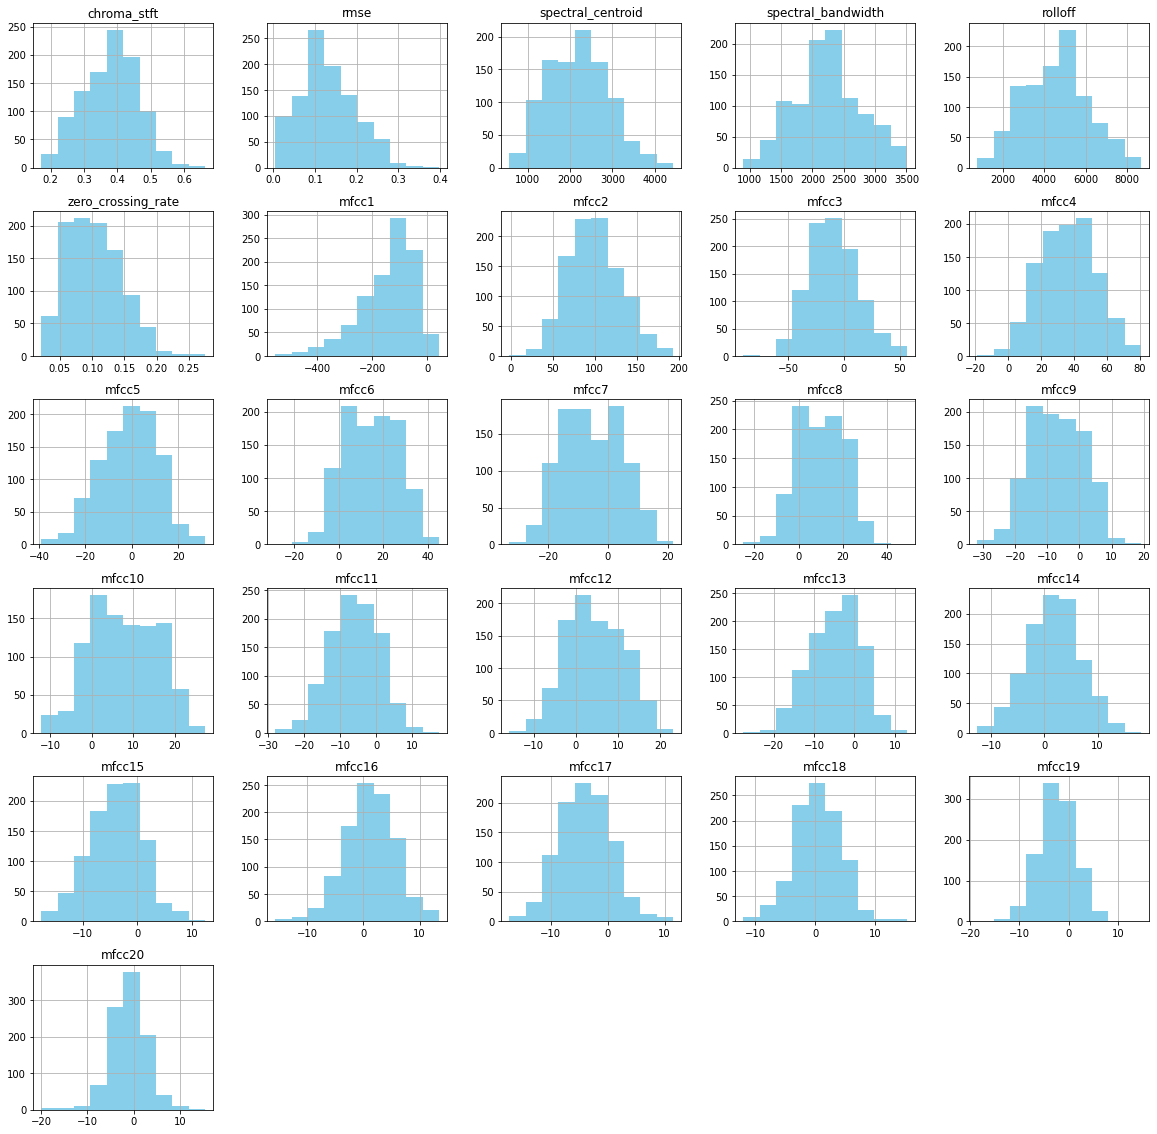

In [10]:
music_data.hist(figsize=(20,20),color='skyblue')
plt.show()

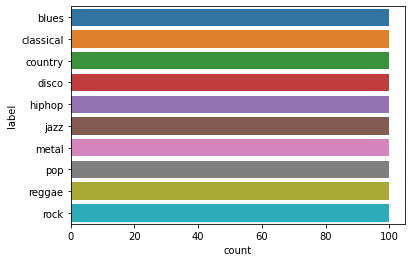

In [11]:
sns.countplot(y='label',data=music_data)

In [12]:
# CHECK FOR CLASS IMBALANCE

print(music_data.columns)
print(music_data['label'].unique())
print(music_data['label'].value_counts())

Index(['filename', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'label'],
      dtype='object')
['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64


In [13]:
music_dataNum = music_data.drop(['filename','label'], axis=1)
music_dataNum.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351028,...,-8.324325,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929
1,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874683,...,-5.560388,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573
2,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,...,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821
3,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,...,-3.196314,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233
4,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,...,-13.083821,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781


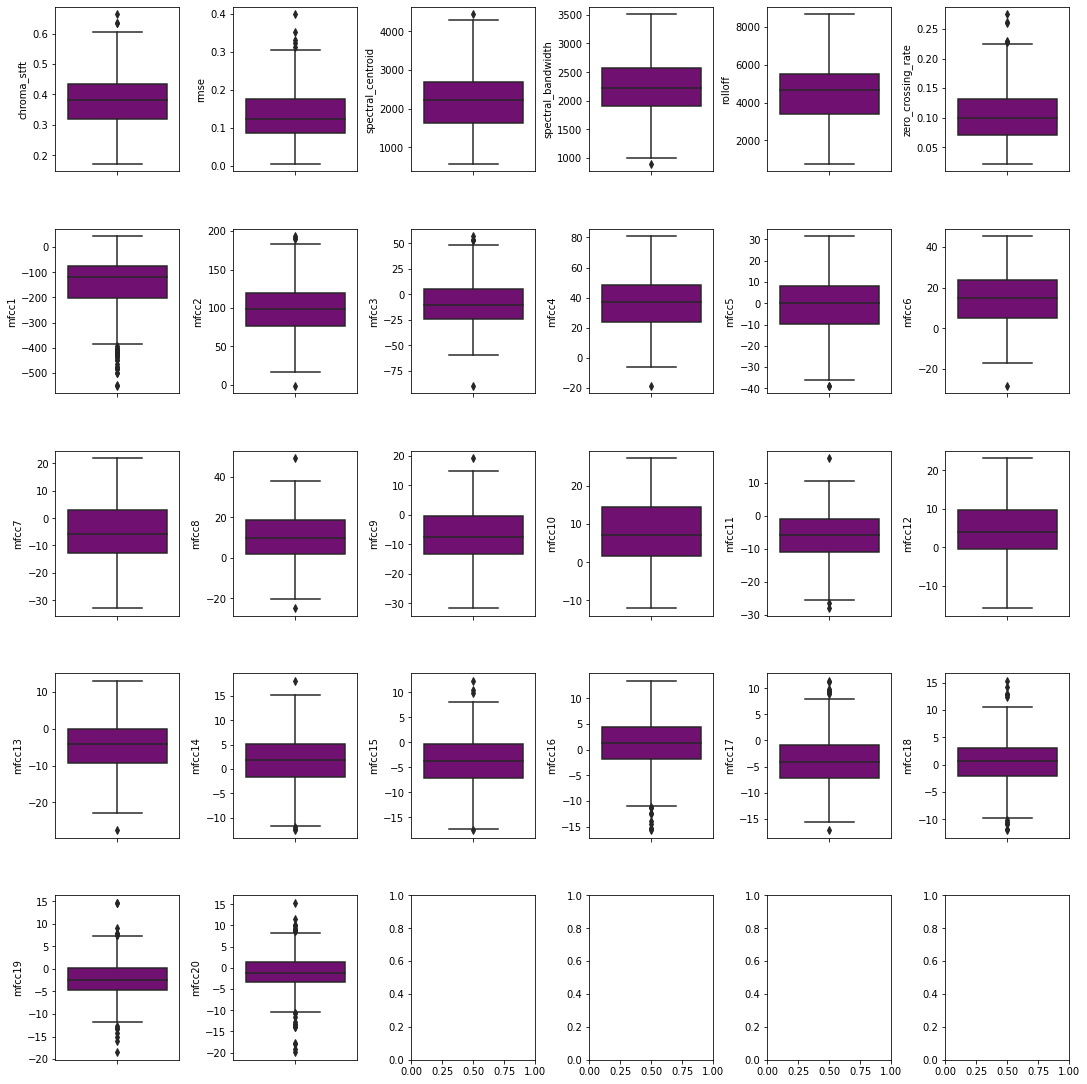

In [14]:
fig, ax = plt.subplots(ncols=6, nrows=5, figsize=(15,15))
index = 0
ax = ax.flatten()

for col, value in music_dataNum.items():
    sns.boxplot(y=col, data=music_dataNum, color='purple', ax=ax[index])
    #print(col)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

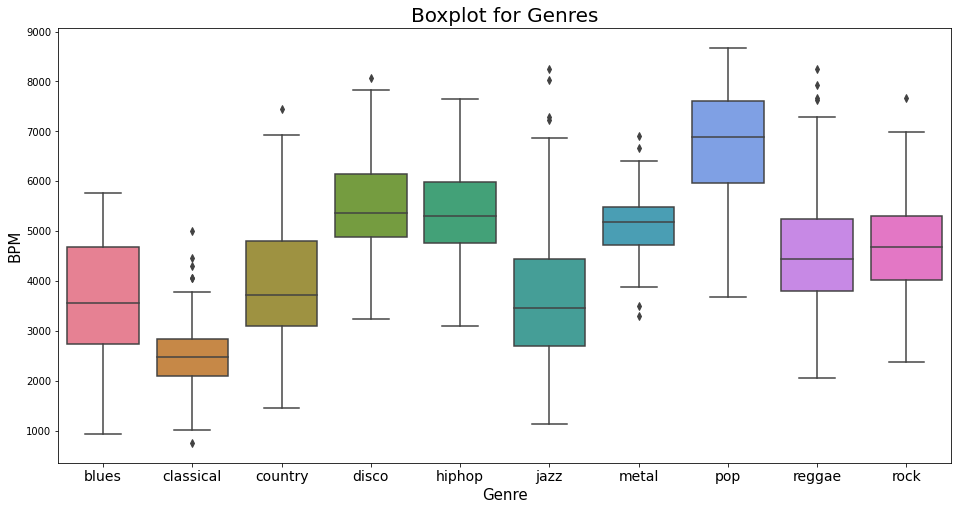

In [15]:
x = music_data[["label", "rolloff"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "rolloff", data = x, palette = 'husl');

plt.title('Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("Boxplot.png")

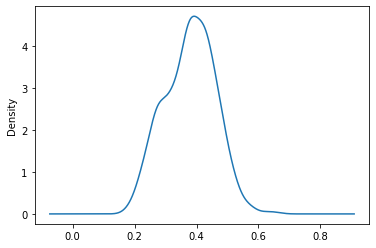

In [16]:
music_data['chroma_stft'].plot.kde()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


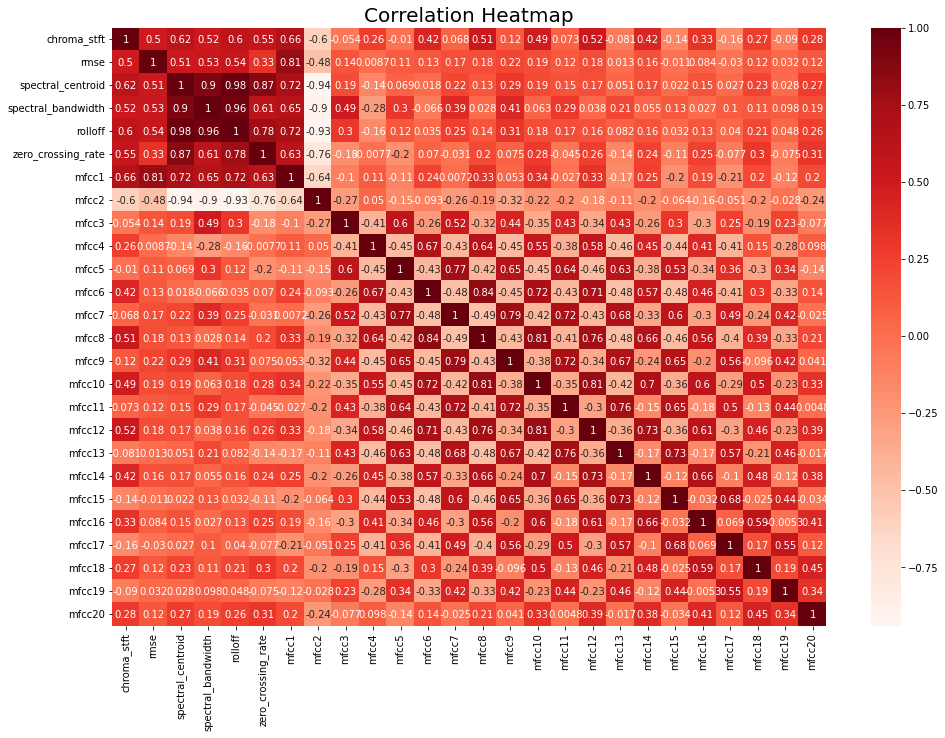

In [17]:
# COMPUTATION OF CORRELATION MATRIX AND HEAT MAP

cols = [col for col in music_data.columns if 'mean' in col]
corr = music_data[cols].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(16, 11));
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)
sns.heatmap(music_data.corr(), annot=True, cmap='Reds')

plt.title('Correlation Heatmap', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [18]:
# OUTLIER REMOVAL

def boudary(music_data):
    Q3 = music_data.rmse.quantile(0.75)
    Q1 = music_data.rmse.quantile(0.25)

    IQR = Q3 - Q1
    Lower_boundary = Q1 - 1.5* IQR
    Upper_boundary = Q3 + 1.5* IQR
    return IQR, Lower_boundary, Upper_boundary

print(boudary(music_data))

(0.08916713325, -0.047125242875, 0.309543290125)


In [19]:
music_data.columns

Index(['filename', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'label'],
      dtype='object')

In [20]:
'''
def IQR_range(features):
    
    Q1 = music_data[features].quantile(0.25)
    Q3 = music_data[features].quantile(0.75)
    IQR = Q3 - Q1
    Lower_boundary = Q1 - 1.5 * IQR
    Upper_boundary = Q3 + 1.5 * IQR
    return Lower_boundary,Upper_boundary

col_list = list(music_data.columns)

for feature in col_list:
    Lower_boundary,Upper_boundary = IQR_range(features)
    music_data.drop(music_data[music_data[features] > Upper_boundary].index, inplace = True)
    music_data.drop(music_data[music_data[features] < Lower_boundary].index, inplace = True)
  '''

'\ndef IQR_range(features):\n    \n    Q1 = music_data[features].quantile(0.25)\n    Q3 = music_data[features].quantile(0.75)\n    IQR = Q3 - Q1\n    Lower_boundary = Q1 - 1.5 * IQR\n    Upper_boundary = Q3 + 1.5 * IQR\n    return Lower_boundary,Upper_boundary\n\ncol_list = list(music_data.columns)\n\nfor feature in col_list:\n    Lower_boundary,Upper_boundary = IQR_range(features)\n    music_data.drop(music_data[music_data[features] > Upper_boundary].index, inplace = True)\n    music_data.drop(music_data[music_data[features] < Lower_boundary].index, inplace = True)\n  '

In [21]:
# PREPROCESSING THE DATA

robustscaler = RobustScaler()
data_tf = robustscaler.fit_transform(music_dataNum)
print(data_tf)

[[-0.28479855  0.08721696 -0.39941553 ... -0.21103138  0.01889306
   0.50840325]
 [-0.36181978 -0.29752353 -0.63864775 ... -0.07347074  0.43653809
   0.36105859]
 [-0.16737979  0.59579455 -0.61736683 ... -0.48578386 -0.21624762
  -0.22938424]
 ...
 [ 0.42145295 -0.45791602 -0.12430129 ...  0.54287851 -2.11707288
  -0.20373658]
 [-0.17815811 -0.43244579 -0.76190085 ...  0.17364938 -0.55025247
  -0.52023411]
 [-0.21386496 -0.7624672  -0.56384093 ... -0.1262868   0.07661342
   0.49525961]]


In [22]:
# MAP LABELS TO INDEX

label_index = dict()
index_label = dict()
for i, x in enumerate(music_data.label.unique()):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


## **Training and Testing**

In [23]:
music_data = music_data.drop(['filename'], axis=1)

In [24]:
music_data

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351028,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874683,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.351991,0.079469,2008.581132,2106.617024,4254.215942,0.089267,-153.632309,109.857262,-23.085709,59.040672,...,12.350816,-12.306271,5.780973,-10.279924,1.791489,-13.304210,2.473193,-6.717574,-1.189238,rock
996,0.398653,0.076452,2006.051164,2068.327905,4147.374921,0.097659,-142.424210,116.219780,-32.177074,49.122971,...,14.065345,-16.394691,4.152589,-4.350760,3.736455,-10.845638,1.875218,-7.459579,-2.802677,rock
997,0.432103,0.081617,2077.190361,1926.989678,4030.767293,0.121824,-125.031311,115.194977,-47.993507,52.834530,...,10.481961,-17.951916,1.211113,-11.534864,1.844774,-12.847901,3.447425,-12.594178,-2.107002,rock
998,0.362349,0.083888,1398.672358,1818.148469,3014.740104,0.048731,-224.972305,123.656891,-9.754534,56.595062,...,7.683081,-10.071786,-0.255098,-5.276486,-2.816289,-4.416438,1.558265,-5.043121,-3.585596,rock


In [25]:
# Seprating X and Y

X = music_data.iloc[:,:-1]
Y = music_data.iloc[:,-1]
Y

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
995     rock
996     rock
997     rock
998     rock
999     rock
Name: label, Length: 1000, dtype: object

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [27]:
y_train

938         rock
88         blues
735          pop
129    classical
925         rock
         ...    
354        disco
773          pop
581         jazz
696        metal
668        metal
Name: label, Length: 750, dtype: object

In [28]:
# PIPELINE

pipelines = []
model_list = [LogisticRegression(max_iter=500),DecisionTreeClassifier(),RandomForestClassifier(),SVC(C=100),KNeighborsClassifier(n_neighbors=7)]
for model in model_list:
    pipeline = make_pipeline(RandomUnderSampler(),RobustScaler(),model,verbose=True)
    pipelines.append(pipeline)

In [29]:
# PARAMETERS

params=[{'logisticregression__solver':['lbfgs','saga','sag'],'logisticregression__penalty':['l2'],
         'logisticregression__class_weight':[None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]},
        {'decisiontreeclassifier__max_depth':range(5,30,5),'decisiontreeclassifier__min_samples_split':[2,3,4,5]},
        {'randomforestclassifier__n_estimators':[10, 50, 100, 250],'randomforestclassifier__max_depth':[5, 10, 20]},
        {'svc__C':[10**-2, 10**-1, 10**0, 10**1, 10**2],'svc__class_weight':[None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]},
        {'kneighborsclassifier__n_neighbors':[2,5,10,25,50]}]

In [30]:
# FUNCTION FOR SCORES, MATRIX AND CLASSIFICATION REPORT

def scores_matrix_report(y_test,y_pred):
    print("Accuracy=",accuracy_score(y_test,y_pred))
    print("Precision=",precision_score(y_test,y_pred,average='macro',zero_division=0))
    print("recall=",recall_score(y_test,y_pred,average='macro'))
    print("f1 score",f1_score(y_test,y_pred,average='macro'))
    print("\nConfusion matrix=\n",confusion_matrix(y_test,y_pred))
    print("\nclassification report=\n",classification_report(y_test,y_pred,zero_division=0))

In [31]:
for pipeline in pipelines:
    pipeline.fit(x_train,y_train)

[Pipeline]  (step 1 of 3) Processing randomundersampler, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   0.1s
[Pipeline]  (step 1 of 3) Processing randomundersampler, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing decisiontreeclassifier, total=   0.0s
[Pipeline]  (step 1 of 3) Processing randomundersampler, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing randomforestclassifier, total=   0.4s
[Pipeline]  (step 1 of 3) Processing randomundersampler, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing svc, total=   0.0s
[Pipeline]  (step 1 of 3) Processing randomundersampler, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0

In [32]:
for pipeline in pipelines:
    print(pipeline.score(x_test,y_test))

0.58
0.416
0.588
0.608
0.528


In [33]:
for pipeline in pipelines:
    print(f1_score(y_test, pipeline.predict(x_test),average='macro'))

0.5712232866649407
0.42162278173716816
0.5806362412396356
0.6142953276912086
0.5175322324977033


In [34]:
# KNN CLASSIFIER

acc_score = []
for k in range(1,50):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(x_train, y_train)
    acc = knc.score(x_test, y_test)
    acc_score.append(acc)
print(acc_score)

[0.32, 0.268, 0.296, 0.284, 0.3, 0.308, 0.316, 0.312, 0.292, 0.296, 0.296, 0.308, 0.316, 0.284, 0.292, 0.292, 0.312, 0.316, 0.3, 0.312, 0.3, 0.324, 0.324, 0.304, 0.32, 0.316, 0.32, 0.324, 0.324, 0.32, 0.312, 0.308, 0.308, 0.316, 0.312, 0.308, 0.316, 0.328, 0.324, 0.332, 0.324, 0.312, 0.312, 0.312, 0.308, 0.308, 0.3, 0.304, 0.292]


test  : 0.292
train : 0.36933333333333335


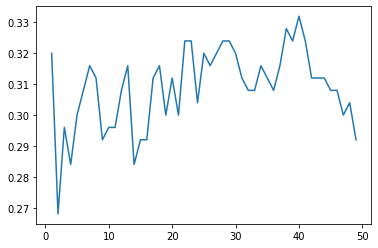

In [35]:
y_pred=knc.predict(x_test)

print("test  :",knc.score(x_test,y_test))
print("train :",knc.score(x_train,y_train))
f1_knn = accuracy_score(y_test, y_pred)

plt.plot(list(range(1,50)), acc_score)
plt.show()

In [36]:
scores_matrix_report(y_test,y_pred)

Accuracy= 0.292
Precision= 0.22680806765308867
recall= 0.29523560262879317
f1 score 0.2491915805975093

Confusion matrix=
 [[ 0  4  5  4  0  3  4  0  4  2]
 [ 0 15  1  0  0  0  1  0  1  0]
 [ 0  5  5  3  3  0  0  0  2  2]
 [ 0  0  1  7  2  0  5  6  2  2]
 [ 1  0  2  8  3  0  7  6  1  3]
 [ 0  8  1  2  0  0  1  3  4  1]
 [ 0  0  0  4  0  0 15  2  0  6]
 [ 0  0  0  6  4  0  1 17  3  0]
 [ 0  0  2  8  2  2  1  1 10  3]
 [ 1  1  5  4  0  1  5  1  4  1]]

classification report=
               precision    recall  f1-score   support

       blues       0.00      0.00      0.00        26
   classical       0.45      0.83      0.59        18
     country       0.23      0.25      0.24        20
       disco       0.15      0.28      0.20        25
      hiphop       0.21      0.10      0.13        31
        jazz       0.00      0.00      0.00        20
       metal       0.38      0.56      0.45        27
         pop       0.47      0.55      0.51        31
      reggae       0.32      0.34 

In [37]:
# RANDOM FOREST

rf = RandomForestClassifier(n_estimators=50,max_features=2,bootstrap=True,max_samples=0.6,n_jobs=-1)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
f1_rf = accuracy_score(y_test, y_pred)
scores_matrix_report(y_test,y_pred)

Accuracy= 0.536
Precision= 0.5310493701145875
recall= 0.536949564230843
f1 score 0.5307467287165416

Confusion matrix=
 [[16  0  3  2  0  3  2  0  0  0]
 [ 0 17  1  0  0  0  0  0  0  0]
 [ 2  1  7  1  0  2  0  2  2  3]
 [ 1  0  3 10  2  1  0  1  0  7]
 [ 0  0  1  8 12  1  2  4  3  0]
 [ 2  4  1  0  0  8  0  3  1  1]
 [ 1  0  0  1  1  0 22  0  0  2]
 [ 0  1  2  0  2  1  0 20  2  3]
 [ 0  0  1  1  5  2  0  0 16  4]
 [ 3  0  3  5  0  2  1  2  1  6]]

classification report=
               precision    recall  f1-score   support

       blues       0.64      0.62      0.63        26
   classical       0.74      0.94      0.83        18
     country       0.32      0.35      0.33        20
       disco       0.36      0.40      0.38        25
      hiphop       0.55      0.39      0.45        31
        jazz       0.40      0.40      0.40        20
       metal       0.81      0.81      0.81        27
         pop       0.62      0.65      0.63        31
      reggae       0.64      0.55    

In [38]:
# Feature Importance using Random Forest

%matplotlib notebook
clf = RandomForestClassifier(random_state=0, n_jobs=-1).fit(x_train, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
# DECISION TREE

dt=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=4)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
f1_dt = accuracy_score(y_test, y_pred)
scores_matrix_report(y_test,y_pred)


Accuracy= 0.416
Precision= 0.43086133991626674
recall= 0.41926296350032866
f1 score 0.4160425992846237

Confusion matrix=
 [[13  0  4  0  0  4  1  0  1  3]
 [ 0 12  1  0  0  3  0  1  1  0]
 [ 2  0  7  1  0  2  0  0  4  4]
 [ 0  0  7  8  1  0  1  7  0  1]
 [ 1  1  1  6  7  0  7  5  3  0]
 [ 6  0  6  1  0  7  0  0  0  0]
 [ 0  0  0  3  1  1 20  0  0  2]
 [ 1  0  4  0  4  2  0 18  1  1]
 [ 1  3  7  7  2  0  1  0  7  1]
 [ 4  0  3  3  0  0  0  3  5  5]]

classification report=
               precision    recall  f1-score   support

       blues       0.46      0.50      0.48        26
   classical       0.75      0.67      0.71        18
     country       0.17      0.35      0.23        20
       disco       0.28      0.32      0.30        25
      hiphop       0.47      0.23      0.30        31
        jazz       0.37      0.35      0.36        20
       metal       0.67      0.74      0.70        27
         pop       0.53      0.58      0.55        31
      reggae       0.32      0.24 

In [40]:
# Feature importance using Decision Tree

clf = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
# LOGISTIC CLASSIFICATION

log_clf=LogisticRegression(solver='saga',max_iter=1000,C=1.0)
log_clf.fit(x_train,y_train)

y_pred = log_clf.predict(x_test)
f1_log = accuracy_score(y_test, y_pred)
scores_matrix_report(y_test,y_pred)

Accuracy= 0.384
Precision= 0.3523275539857408
recall= 0.38647981881681165
f1 score 0.3507110939625021

Confusion matrix=
 [[ 3  2  3  4  0  7  5  0  0  2]
 [ 0 15  2  0  0  1  0  0  0  0]
 [ 4  0  6  0  0  2  1  2  3  2]
 [ 0  0  5  6  1  0  3  6  0  4]
 [ 0  1  0  4  5  2  5  8  4  2]
 [ 3  6  0  2  0  6  0  1  2  0]
 [ 0  0  0  3  0  0 21  0  0  3]
 [ 0  0  2  0  2  2  0 24  1  0]
 [ 4  3  2  1  3  5  1  2  8  0]
 [ 4  0  4  3  0  2  4  4  0  2]]

classification report=
               precision    recall  f1-score   support

       blues       0.17      0.12      0.14        26
   classical       0.56      0.83      0.67        18
     country       0.25      0.30      0.27        20
       disco       0.26      0.24      0.25        25
      hiphop       0.45      0.16      0.24        31
        jazz       0.22      0.30      0.26        20
       metal       0.53      0.78      0.63        27
         pop       0.51      0.77      0.62        31
      reggae       0.44      0.28  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [42]:
# SVM
'''
svc=SVC(kernel='linear',gamma='scale',degree=8,C=10)
svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)
f1_svc = accuracy_score(y_test, y_pred)
scores_matrix_report(y_test,y_pred)
'''

"\nsvc=SVC(kernel='linear',gamma='scale',degree=8,C=10)\nsvc.fit(x_train,y_train)\n\ny_pred = svc.predict(x_test)\nf1_svc = accuracy_score(y_test, y_pred)\nscores_matrix_report(y_test,y_pred)\n"

In [43]:
# BAGGING

X_fit, X_eval, y_fit, y_test= model_selection.train_test_split( X, Y, test_size=1/3, random_state=1 )
kfold = model_selection.KFold(n_splits=5)

cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)

results = model_selection.cross_val_score(model, X_fit, y_fit,cv=kfold)
for i in range(len(results)):
    print("Model: "+str(i)+" Accuracy is: "+str(results[i]))
    
print("Mean Accuracy is: "+str(results.mean()))
model.fit(X_fit, y_fit)
pred_label = model.predict(X_eval)

Model: 0 Accuracy is: 0.6417910447761194
Model: 1 Accuracy is: 0.6015037593984962
Model: 2 Accuracy is: 0.5714285714285714
Model: 3 Accuracy is: 0.556390977443609
Model: 4 Accuracy is: 0.518796992481203
Mean Accuracy is: 0.5779822691055998


In [44]:
scores = [
    {'model': 'KNN', 'score': f1_knn},
    {'model': 'DecisionTree', 'score': f1_dt},
    {'model': 'RandomForest', 'score': f1_rf},
    {'model': 'LogisticRegr', 'score': f1_log}]
    #{'model': 'SVC', 'score': f1_svc}

scores=pd.DataFrame(scores).set_index('model')
scores

,score
model,
KNN,0.292
DecisionTree,0.416
RandomForest,0.536
LogisticRegr,0.384


# **Music Genre Classification Demo**

In [45]:
! pip install pygame
! pip install SpeechRecognition
! pip install python_speech_features

     |████████████████████████████████| 21.8 MB 25.9 MB/s 
     |████████████████████████████████| 32.8 MB 1.6 MB/s 
  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=aca317583290c10507e37b24af6a95676775a5202d6c1be9e45a12213b06a820
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [46]:
from tkinter import *
from tkinter import ttk
import scipy.io.wavfile as wav
from python_speech_features import mfcc
from tempfile import TemporaryFile
import os
import math
import pickle
import random
import operator
import pygame
from pygame import mixer

pygame 2.1.2 (SDL 2.0.16, Python 3.7.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


###Functions to play music

In [47]:
def playsong(self):
  self.track.set(self.playlist.get(ACTIVE))
  self.status.set("-playing")
  pygame.mixer.music.load(self.playlist.get(ACTIVE))
  pygame.mixer.music.play()

def stopsong(self):
  self.status.set("-Stopped")
  pygame.mixer.music.stop()

def pausesong(self):
  self.status.set("-Paused")
  pygame.mixer.music.pause()

def unpausesong(self):
  self.status.set("-Playing")
  pygame.mixer.music.unpause()

def play_music():
  mixer.music.play()
def pause_music():
  mixer.music.pause()

### Using KNN classifier

In [48]:
def distance(instance1, instance2, k):
    distance = 0
    mm1 = instance1[0]
    cm1 = instance1[1]
    mm2 = instance2[0]
    cm2 = instance2[1]
    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1))
    distance += (np.dot(np.dot((mm2-mm1).transpose(), np.linalg.inv(cm2)), mm2-mm1))
    distance += np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
    distance -= k
    return distance

#define a function to get distance between feature vectors and find neighbors

def getNeighbors(trainingset, instance, k):
    distances = []
    for x in range(len(trainingset)):
        dist = distance(trainingset[x], instance, k) + distance(instance,trainingset[x],k)
        distances.append((trainingset[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

#function to identify the nearest neighbors

def nearestclass(neighbors):
    classVote = {}
    
    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response] += 1
        else:
            classVote[response] = 1
            
    sorter = sorted(classVote.items(), key=operator.itemgetter(1), reverse=True)
    return sorter[0][0]

# Model Evaluation

def getAccuracy(testSet, prediction):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == prediction[x]:
            correct += 1
    return 1.0 * correct / len(testSet)

### User Interface

In [50]:
class MusicPlayer:
  def __init__(self,root):
    self.root = root
    self.root.title("MusicPlayer")
    self.root.geometry("1000x200+200+200")
    pygame.init()
    pygame.mixer.init()
    self.track = StringVar()
    self.status = StringVar()
  def MusicPlayer(self):
    MusicPlayer = print(self.root)

    # Creating the Track Frames for Song label & status label
    trackframe = LabelFrame(self.root,text="Song Track",font=("times new roman",15,"bold"),bg="Navyblue",fg="white",bd=5,relief=GROOVE)
    trackframe.place(x=0,y=0,width=600,height=100)
    songtrack = Label(trackframe,textvariable=self.track,width=20,font=("times new roman",24,"bold"),bg="Orange",fg="gold").grid(row=0,column=0,padx=10,pady=5)
    trackstatus = Label(trackframe,textvariable=self.status,font=("times new roman",24,"bold"),bg="orange",fg="gold").grid(row=0,column=1,padx=10,pady=5)

    # Creating Button Frame
    buttonframe = LabelFrame(self.root,text="Control Panel",font=("times new roman",15,"bold"),bg="grey",fg="white",bd=5,relief=GROOVE)
    buttonframe.place(x=0,y=100,width=600,height=100)
    playbtn = Button(buttonframe,text="PLAYSONG",command=self.playsong,width=10,height=1,font=("times new roman",16,"bold"),fg="navyblue",bg="pink").grid(row=0,column=0,padx=10,pady=5)
    playbtn = Button(buttonframe,text="PAUSE",command=self.pausesong,width=8,height=1,font=("times new roman",16,"bold"),fg="navyblue",bg="pink").grid(row=0,column=1,padx=10,pady=5)
    playbtn = Button(buttonframe,text="UNPAUSE",command=self.unpausesong,width=10,height=1,font=("times new roman",16,"bold"),fg="navyblue",bg="pink").grid(row=0,column=2,padx=10,pady=5)
    playbtn = Button(buttonframe,text="STOPSONG",command=self.stopsong,width=10,height=1,font=("times new roman",16,"bold"),fg="navyblue",bg="pink").grid(row=0,column=3,padx=10,pady=5)

    # Creating Playlist Frame
    songsframe = LabelFrame(self.root,text="Song Playlist",font=("times new roman",15,"bold"),bg="grey",fg="white",bd=5,relief=GROOVE)
    songsframe.place(x=600,y=0,width=400,height=200)

    # Inserting scrollbar
    scrol_y = Scrollbar(songsframe,orient=VERTICAL)
    self.playlist = Listbox(songsframe,yscrollcommand=scrol_y.set,selectbackground="gold",selectmode=SINGLE,font=("times new roman",12,"bold"),bg="silver",fg="navyblue",bd=5,relief=GROOVE)
    scrol_y.pack(side=RIGHT,fill=Y)
    scrol_y.config(command=self.playlist.yview)
    self.playlist.pack(fill=BOTH)

    # Changing Directory for fetching Songs
    os.chdir("PATH/OF/DIRECTORY")
    songtracks = os.listdir()
    for track in songtracks:
      self.playlist.insert(END,track)

In [51]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Harman Project/Colab Notebooks/genres_original'

Mounted at /content/gdrive


## Feature Extraction

In [53]:
#directory123 = 'C:/Users/Dell/Desktop/Rithika HARMAN AIML/Rithika files/PROJECT-Music Genre/genres_original'
directory123 = 'gdrive/My Drive/Harman Project/Colab Notebooks/genres_original'
f = open("music", "wb")
i = 0
#folder = " "
for folder in os.listdir(directory123):
  i += 1
  for file in os.listdir(directory123+"/"+folder):
    try:
      (rate, sig) = wav.read(directory123+"/"+folder+"/"+file)
      mfcc_feat = mfcc(sig, rate, winlen=0.020, appendEnergy=False)
      covariance = np.cov(np.matrix.transpose(mfcc_feat))
      mean_matrix = mfcc_feat.mean(0)
      feature = (mean_matrix, covariance, i)
      pickle.dump(feature, f)
    except Exception as e:
      print("Got an exception : ", e, 'in folder :', folder, 'filename: ', file)
f.close()

In [55]:
# Train-test split the dataset

dataset = []
def loadDataset(filename, split, trset, teset):
    with open('music','rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break
    for x in range(len(dataset)):
        if random.random() < split:
            trset.append(dataset[x])
        else:
            teset.append(dataset[x])

trainingSet = []
testSet = []
loadDataset('music', 0.68, trainingSet, testSet)

# Make the prediction using KNN(K nearest Neighbors)

length = len(testSet)
predictions = []
for x in range(length):
    predictions.append(nearestclass(getNeighbors(trainingSet, testSet[x], 5)))

accuracy1 = getAccuracy(testSet, predictions)
print(accuracy1)
plt.plot(np.linspace(1,5,1), accuracy1)
plt.show()

0.7878787878787878


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
# Test the Classifier with the new Audio File

from collections import defaultdict
results = defaultdict(int)

directory = directory123 = 'gdrive/My Drive/Harman Project/Colab Notebooks/genres_original'
i = 1
for folder in os.listdir(directory):
    results[i] = folder
    i += 1

pred = nearestclass(getNeighbors(dataset, feature, 5))
print(results[pred])

disco


In [57]:
# CREATE VIRTUAL DISPLAY
!apt-get install -y xvfb
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')
os.environ['DISPLAY']=':1.0'
os.environ['SDL_AUDIODRIVER'] = 'dsp'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 784 kB in 1s (878 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 155203 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [61]:
root = Tk()
MusicPlayer.instance = MusicPlayer(root)
root.mainloop()

### Result prediction

In [59]:
result_prediction = []

for i in music_data.iloc[10]:
  result_prediction.append(i)
result_prediction.pop()
print(result_prediction)

[0.303954512, 0.142939135, 1410.469096, 1512.620983, 2767.274933, 0.062980723, -173.7075043, 137.1564026, -23.76651764, 26.98937035, -16.6684227, 4.198450565, -12.56663036, 5.834843636, -2.881736994, -1.208680749, -1.965736628, 1.800535202, -2.988374472, -1.86938858, -0.80015552, -3.0237813, -0.445196003, -1.998227358, -0.74359858, -4.986112595]


In [60]:
print(rf.predict([result_prediction]))

['blues']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
